In [ ]:
import os
import shutil
from google.colab import drive ## If running on google colab
import librosa
drive.mount('/content/drive/')
import csv

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


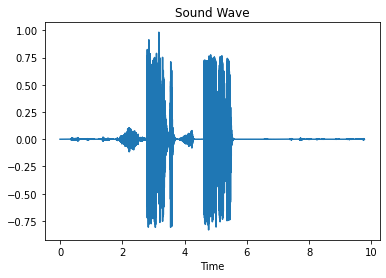

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
filename='aae89248-2aeb-43fc-800b-d29d8aead672.wav'
filepath='/content/drive/MyDrive/Colab Notebooks/ORGANIZE/SMOTE/'

signal,sr=librosa.load(filepath+filename,sr =20000)
#signal = signal/(np.max(np.abs(signal)))  
# gets the frame rate

time = np.linspace(0,len(signal) / sr, num = len(signal))
# using matlplotlib to plot
# creates a new figure
plt.figure(1)
  
# title of the plot
plt.title("Sound Wave")
  
# label of x-axis
plt.xlabel("Time")
  
# actual ploting
plt.plot(time, signal)
  
# shows the plot 
# in new window
plt.show()

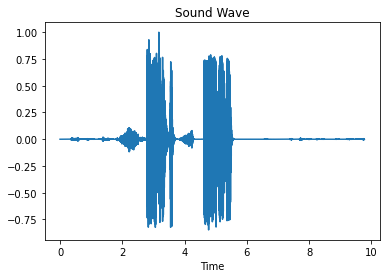

In [ ]:
signal,sr=librosa.load(filepath+filename,sr =20000)
signal = signal/(np.max(np.abs(signal)))  
# gets the frame rate

time = np.linspace(0,len(signal) / sr, num = len(signal))
time = np.linspace(0,len(signal) / sr, num = len(signal))
# using matlplotlib to plot
# creates a new figure
plt.figure(1)
  
# title of the plot
plt.title("Sound Wave")
  
# label of x-axis
plt.xlabel("Time")
  
# actual ploting
plt.plot(time, signal)
  
# shows the plot 
# in new window
plt.show()

In [ ]:
def segment_cough(x,fs, cough_padding=0.2,min_cough_len=0.2, th_l_multiplier = 0.01, th_h_multiplier = 2):
    """Preprocess the data by segmenting each file into individual coughs using a hysteresis comparator on the signal power
    
    Inputs:
    *x (np.array): cough signal
    *fs (float): sampling frequency in Hz
    *cough_padding (float): number of seconds added to the beginning and end of each detected cough to make sure coughs are not cut short
    *min_cough_length (float): length of the minimum possible segment that can be considered a cough
    *th_l_multiplier (float): multiplier of the RMS energy used as a lower threshold of the hysteresis comparator
    *th_h_multiplier (float): multiplier of the RMS energy used as a high threshold of the hysteresis comparator
    
    Outputs:
    *coughSegments (np.array of np.arrays): a list of cough signal arrays corresponding to each cough
    cough_mask (np.array): an array of booleans that are True at the indices where a cough is in progress"""
                
    cough_mask = np.array([False]*len(x))
    

    #Define hysteresis thresholds
    rms = np.sqrt(np.mean(np.square(x)))
    seg_th_l = th_l_multiplier * rms
    seg_th_h =  th_h_multiplier*rms

    #Segment coughs
    coughSegments = []
    padding = round(fs*cough_padding)
    min_cough_samples = round(fs*min_cough_len)
    cough_start = 0
    cough_end = 0
    cough_in_progress = False
    tolerance = round(0.01*fs)
    below_th_counter = 0
    
    for i, sample in enumerate(x**2):
        if cough_in_progress:
            if sample<seg_th_l:
                below_th_counter += 1
                if below_th_counter > tolerance:
                    cough_end = i+padding if (i+padding < len(x)) else len(x)-1
                    cough_in_progress = False
                    if (cough_end+1-cough_start-2*padding>min_cough_samples):
                        coughSegments.append(x[cough_start:cough_end+1])
                        cough_mask[cough_start:cough_end+1] = True
            elif i == (len(x)-1):
                cough_end=i
                cough_in_progress = False
                if (cough_end+1-cough_start-2*padding>min_cough_samples):
                    coughSegments.append(x[cough_start:cough_end+1])
            else:
                below_th_counter = 0
        else:
            if sample>seg_th_h:
                cough_start = i-padding if (i-padding >=0) else 0
                cough_in_progress = True
    
    return coughSegments, cough_mask

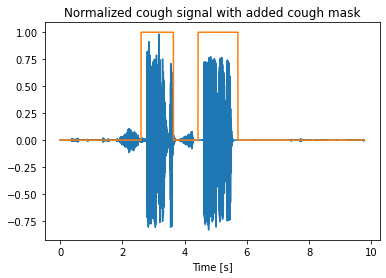

In [ ]:
f_rate = 20000
#time = np.linspace(0,len(signal) / f_rate, num = len(signal))
seg_signal,cough_mask=segment_cough(signal,f_rate, cough_padding=0.2,min_cough_len=0.2, th_l_multiplier = 0.1, th_h_multiplier = 2)
plt.figure(1)
# title of the plot
plt.title("Normalized cough signal with added cough mask") 
# label of x-axis
plt.xlabel("Time [s]")
# actual ploting
plt.plot(time, signal)
plt.plot(time, cough_mask)
# shows the plot 
# in new window
plt.show()

In [ ]:
print(len(seg_signal))
all_seg_signal=[]
for line in seg_signal:
  all_seg_signal=np.append(all_seg_signal,line)
print(all_seg_signal)
time_seg = np.linspace(0,len(all_seg_signal) / sr, num = len(all_seg_signal))

3
[-4.72932588e-03 -4.89106635e-03 -4.15498205e-03 ...  9.13720869e-05
  9.26882785e-05  8.70799777e-05]


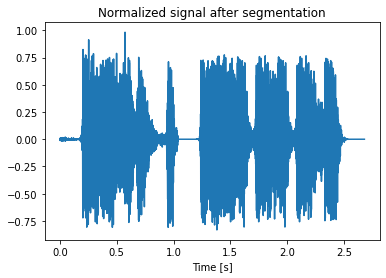

In [ ]:
plt.figure(2)
# title of the plot
plt.title("Normalized signal after segmentation") 
# label of x-axis
plt.xlabel("Time [s]")
# actual ploting
plt.plot(time_seg, all_seg_signal)
# shows the plot 
# in new window
plt.show()

In [ ]:
print(sr)
print(all_seg_signal)
time_seg = np.linspace(0,len(all_seg_signal)/sr, num = len(all_seg_signal))
print(len(time_seg))

20000
[-4.81698196e-03 -4.98172035e-03 -4.23199311e-03 ...  9.30656315e-05
  9.44062194e-05  8.86939670e-05]
53623


In [ ]:
#Mean and standard deviation
import numpy as np
from python_speech_features import mfcc
win_len=0.015
filepath='/content/drive/MyDrive/Colab Notebooks/ORGANIZE/SMOTE/'
file_he='052fc88d-aa01-4422-85fd-f0ddebb8bd95.wav'
signal,sr=librosa.load(filepath+file_he,sr =20000)
signal = signal/(np.max(np.abs(signal)))  
all_segments=[]
segment,mask=segment_cough(signal,sr,cough_padding=0.1,min_cough_len=0.1, th_l_multiplier = 0.1, th_h_multiplier = 2)
f_down=sr
for line in segment:
  all_segments=np.append(all_segments,line)
if len(all_segments) < (f_down*0.5):
  missing_samples = int((f_down*0.5) - len(all_segments))
  all_segments = np.pad(all_segments, (0, missing_samples), "constant", constant_values=0)
elif len(all_segments) > (f_down*0.5):
  all_segments = all_segments[: int(f_down*0.5)]
mfcc_feat = mfcc(all_segments, sr, numcep=26, nfft=4096, winlen=win_len, winstep=win_len/2)

In [ ]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=3427fc6f51ad7ee4134407baba2b914c3accfe1ab1980ecb3cf53dbd7c8b0ecb
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


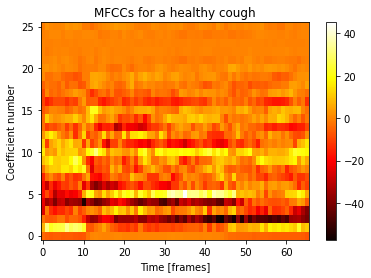

In [ ]:
import matplotlib.pyplot as plt
import librosa
from matplotlib import cm
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower', aspect='auto')

ax.set_title('MFCCs for a healthy cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data


#ig.colorbar(plt.cm.ScalarMappable(cmap='hot'),
#             cax=ax, orientation='vertical')
plt.colorbar(cax).ax.yaxis.set_label_position('left')
plt.show()

In [ ]:
file_co='0379c586-c500-483c-83a6-95b63afe6931.wav'
signal,sr=librosa.load(filepath+file_co,sr =20000)
signal = signal/(np.max(np.abs(signal)))  
all_segments=[]
segment,mask=segment_cough(signal,sr,cough_padding=0.1,min_cough_len=0.1, th_l_multiplier = 0.1, th_h_multiplier = 2)
f_down=sr
for line in segment:
  all_segments=np.append(all_segments,line)
if len(all_segments) < (f_down*0.5):
  missing_samples = int((f_down*0.5) - len(all_segments))
  all_segments = np.pad(all_segments, (0, missing_samples), "constant", constant_values=0)
elif len(all_segments) > (f_down*0.5):
  all_segments = all_segments[: int(f_down*0.5)]
mfcc_feat = mfcc(all_segments, sr, numcep=26, nfft=4096, winlen=win_len, winstep=win_len/2)

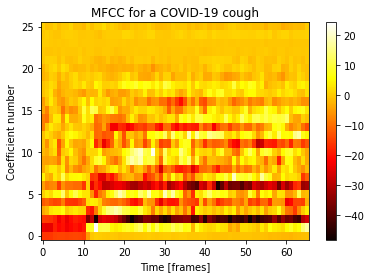

In [ ]:
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower', aspect='auto')
ax.set_title('MFCC for a COVID-19 cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax).ax.yaxis.set_label_position('left')
plt.show()

In [ ]:
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower', aspect='auto')
ax.set_title('MFCC for a COVID-19 cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax).ax.yaxis.set_label_position('left')
plt.show()

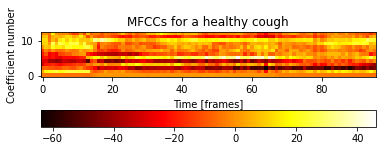

In [ ]:
#second set of time varying
#Mean and standard deviation
import numpy as np
from python_speech_features import mfcc
import math
import matplotlib as mpl
winlen=0.025
num_windows = 100
filepath='/content/drive/MyDrive/Colab Notebooks/ORGANIZE/SMOTE/'
file_he='052fc88d-aa01-4422-85fd-f0ddebb8bd95.wav'
signal,sr=librosa.load(filepath+file_he,sr =20000)
signal = signal/(np.max(np.abs(signal)))  
all_segments=[]
segment,mask=segment_cough(signal,sr,cough_padding=0.1,min_cough_len=0.1, th_l_multiplier = 0.1, th_h_multiplier = 2)
f_down=sr
for line in segment:
  all_segments=np.append(all_segments,line)
if len(all_segments) < (f_down*0.5):
  missing_samples = int((f_down*0.5) - len(all_segments))
  all_segments = np.pad(all_segments, (0, missing_samples), "constant", constant_values=0)
elif len(all_segments) > (f_down*0.5):
  all_segments = all_segments[: int(f_down*0.5)]
overlap=math.ceil(len(all_segments)/(num_windows))
mfcc_feat=mfcc(all_segments,sr, numcep =13,winlen =winlen,winstep=overlap /sr)

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower')
ax.set_title('MFCCs for a healthy cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
#plt.colorbar(cax).ax.yaxis.set_label_position('left')
plt.colorbar(cax, orientation = 'horizontal')
plt.show()

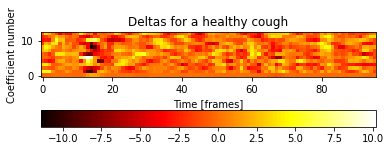

In [ ]:
from python_speech_features import delta
deltas = delta(mfcc_feat, 2)
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(deltas, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower')
ax.set_title('Deltas for a healthy cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax, orientation = 'horizontal')
plt.show()

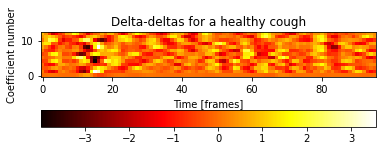

In [ ]:
from python_speech_features import delta
deltas_delta = delta(deltas, 2)
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(deltas_delta, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower')
ax.set_title('Delta-deltas for a healthy cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax, orientation = 'horizontal')
plt.show()

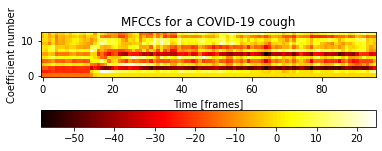

In [ ]:
file_co='0379c586-c500-483c-83a6-95b63afe6931.wav'
signal,sr=librosa.load(filepath+file_co,sr =20000)
signal = signal/(np.max(np.abs(signal)))  
all_segments=[]
segment,mask=segment_cough(signal,sr,cough_padding=0.1,min_cough_len=0.1, th_l_multiplier = 0.1, th_h_multiplier = 2)
f_down=sr
for line in segment:
  all_segments=np.append(all_segments,line)
if len(all_segments) < (f_down*0.5):
  missing_samples = int((f_down*0.5) - len(all_segments))
  all_segments = np.pad(all_segments, (0, missing_samples), "constant", constant_values=0)
elif len(all_segments) > (f_down*0.5):
  all_segments = all_segments[: int(f_down*0.5)]
overlap=math.ceil(len(all_segments)/(num_windows))
mfcc_feat=mfcc(all_segments,sr, numcep =13,winlen =winlen,winstep=overlap /sr)
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower')
ax.set_title('MFCCs for a COVID-19 cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax, orientation = 'horizontal')
plt.show()

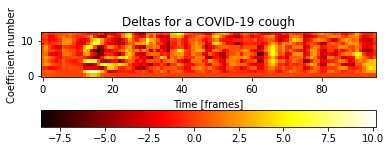

In [ ]:
from python_speech_features import delta
deltas = delta(mfcc_feat, 2)
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(deltas, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower')
ax.set_title('Deltas for a COVID-19 cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax, orientation = 'horizontal')
plt.show()

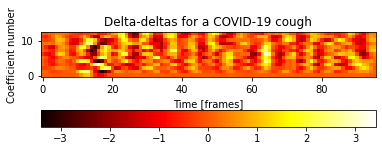

In [ ]:
from python_speech_features import delta
deltas_delta = delta(deltas, 2)
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(deltas_delta, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap='hot', origin='lower')
ax.set_title('Delta-deltas for a COVID-19 cough')
ax.set_xlabel('Time [frames]')
ax.set_ylabel('Coefficient number')
#Showing mfcc_data
plt.colorbar(cax, orientation = 'horizontal')
plt.show()